In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf

In [7]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [9]:
noise = np.random.randn(len(x_data))

In [11]:
x_data.shape

(1000000,)

y = mx + b

b = 5

In [14]:
y_true = (0.5 * x_data) + 5 + noise


In [19]:
y_true
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y Data'])
y_df.head()

,Y Data
0,4.670684
1,5.970286
2,1.916792
3,5.442212
4,4.825751


In [20]:
my_data = pd.concat([x_df, y_df], axis=1)

In [21]:
my_data

,X Data,Y Data
0,0.00000,4.670684
1,0.00001,5.970286
2,0.00002,1.916792
3,0.00003,5.442212
4,0.00004,4.825751
...,...,...
999995,9.99996,10.922560
999996,9.99997,10.104700
999997,9.99998,9.975602
999998,9.99999,9.572210


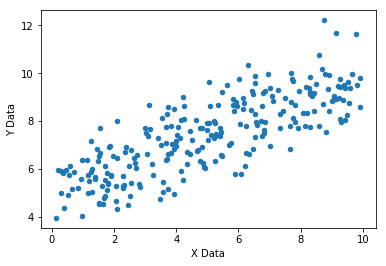

In [23]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y Data')

In [24]:
batch_size = 10

In [26]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [27]:
y_model = m*xph + b

In [29]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [30]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [31]:
init = tf.global_variables_initializer()

In [34]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed_dict = {xph: x_data[rand_ind], yph: y_true[rand_ind]}
        sess.run(train, feed_dict=feed_dict)
    model_m, model_b = sess.run([m,b])

In [35]:
moel_b


NameError: name 'moel_b' is not defined

In [36]:
model_b

4.9516225

In [37]:
model_m

0.48538196

In [38]:
y_hat = x_data*model_m + model_b

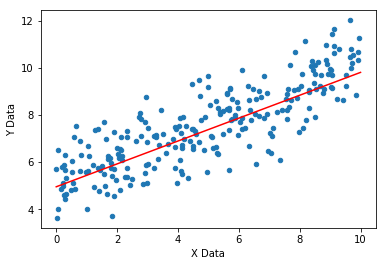

In [41]:
my_data.sample(250).plot(kind='scatter',x='X Data', y='Y Data')
plt.plot(x_data,y_hat,'r')

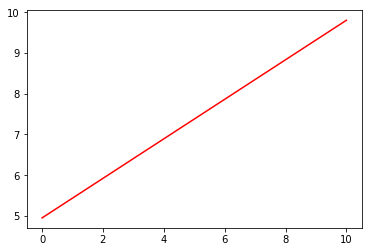

## TF ESTIMATOR

In [132]:
feat_cols = [tf.feature_column.numeric_column('x', shape=(1))]

In [133]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_model_dir': '/tmp/tmp0or7pigk', '_session_config': None}


In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3,random_state=101)

In [136]:
x_train.shape


(700000,)

In [137]:
x_test.shape

(300000,)

In [138]:
y_train.shape


(700000,)

In [139]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [140]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [141]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_test}, y_test, batch_size=8, num_epochs=1000, shuffle=False)

In [143]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tmp0or7pigk/model.ckpt-10
INFO:tensorflow:Saving checkpoints for 11 into /tmp/tmp0or7pigk/model.ckpt.
INFO:tensorflow:loss = 60.486633, step = 11
INFO:tensorflow:global_step/sec: 220.22
INFO:tensorflow:loss = 29.878105, step = 111 (0.458 sec)
INFO:tensorflow:global_step/sec: 205.143
INFO:tensorflow:loss = 25.851788, step = 211 (0.487 sec)
INFO:tensorflow:global_step/sec: 231.662
INFO:tensorflow:loss = 11.431379, step = 311 (0.433 sec)
INFO:tensorflow:global_step/sec: 206.845
INFO:tensorflow:loss = 18.251244, step = 411 (0.482 sec)
INFO:tensorflow:global_step/sec: 219.66
INFO:tensorflow:loss = 10.570072, step = 511 (0.455 sec)
INFO:tensorflow:global_step/sec: 212.725
INFO:tensorflow:loss = 3.7299972, step = 611 (0.470 sec)
INFO:tensorflow:global_step/sec: 216.879
INFO:tensorflow:loss = 12.763526, step = 711 (0.461 sec)
INFO:tensorflow:global_step/sec: 213.892
INFO:tensorflow:loss = 4.0924253, step

In [144]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2019-09-14-09:20:02
INFO:tensorflow:Restoring parameters from /tmp/tmp0or7pigk/model.ckpt-1010
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000]
INFO:tensorflow:Evaluati

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [145]:
test_metrics = estimator.evaluate(input_fn=test_input_func,steps=1000
                                 )

INFO:tensorflow:Starting evaluation at 2019-09-14-09:21:52
INFO:tensorflow:Restoring parameters from /tmp/tmp0or7pigk/model.ckpt-1010
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000]
INFO:tensorflow:Evaluati

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [146]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'loss': 8.513501, 'average_loss': 1.0641876, 'global_step': 1010}


In [147]:
print('Testing Data Metrics')
print(test_metrics)

Testing Data Metrics
{'loss': 8.478097, 'average_loss': 1.0597621, 'global_step': 1010}


In [152]:
brand_new_data = np.linspace(0,10,10)


In [153]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data},shuffle=False)

In [154]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /tmp/tmp0or7pigk/model.ckpt-1010


[{'predictions': array([4.5040817], dtype=float32)},
 {'predictions': array([5.1430254], dtype=float32)},
 {'predictions': array([5.7819686], dtype=float32)},
 {'predictions': array([6.420912], dtype=float32)},
 {'predictions': array([7.0598555], dtype=float32)},
 {'predictions': array([7.698798], dtype=float32)},
 {'predictions': array([8.337742], dtype=float32)},
 {'predictions': array([8.976686], dtype=float32)},
 {'predictions': array([9.615629], dtype=float32)},
 {'predictions': array([10.254572], dtype=float32)}]

In [155]:
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from /tmp/tmp0or7pigk/model.ckpt-1010


In [156]:
predictions


[array([4.5040817], dtype=float32),
 array([5.1430254], dtype=float32),
 array([5.7819686], dtype=float32),
 array([6.420912], dtype=float32),
 array([7.0598555], dtype=float32),
 array([7.698798], dtype=float32),
 array([8.337742], dtype=float32),
 array([8.976686], dtype=float32),
 array([9.615629], dtype=float32),
 array([10.254572], dtype=float32)]

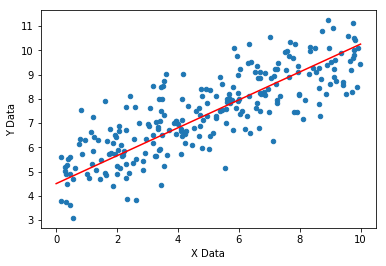

In [159]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y Data')
plt.plot(brand_new_data, predictions,'r')

In [ ]:
train